In [1]:
import os,shutil

original_dataset_dir = 'datasets/cats_and_dogs/train'

base_dir = 'datasets/cats_and_dogs_small'
os.mkdir(base_dir)


In [2]:
"train, validation, test 디렉토리 만들기"
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

"train, validation, test 각 디렉토리에 cats 폴더와 dogs 폴더 추가"
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)



In [3]:
"처음 1000개를 훈련용 고양이 폴더에 복사"
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
"다음 500개를 검증용 고양이 폴더에 복사"
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

"다음 500개를 테스트용 고양이 폴더에 복사"
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

    

"처음 1000개를 훈련용 강아지 폴더에 복사"
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

"다음 500개를 검증용 강아지 폴더에 복사"
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

"다음 500개를 테스트용 강아지 폴더에 복사"
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames :
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [4]:
print('훈련용 고양이 이미지 수 : ',len(os.listdir(train_cats_dir)))
print('검증용 고양이 이미지 수 : ',len(os.listdir(validation_cats_dir)))
print('테스트용 고양이 이미지 수 : ',len(os.listdir(test_cats_dir)))
print()
print('훈련용 강아지 이미지 수 : ',len(os.listdir(train_dogs_dir)))
print('검증용 강아지 이미지 수 : ',len(os.listdir(validation_dogs_dir)))
print('테스트용 강아지 이미지 수 : ',len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 수 :  1000
검증용 고양이 이미지 수 :  500
테스트용 고양이 이미지 수 :  500

훈련용 강아지 이미지 수 :  1000
검증용 강아지 이미지 수 :  500
테스트용 강아지 이미지 수 :  500


In [5]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


Using TensorFlow backend.


In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [7]:
from keras import optimizers

"출력 유닛이 1이기 때문에 이진 분류이다. 따라서 손실 함수는 binary_crossentropy로 사용"
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

"데이터 스케일을 0에서 1사이로 바꿔줌. 원래는 RGB기 때문에 0 ~ 255 사이."
"신경망은 작은 입력 값을 선호함"
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

"제너레이터의 출력은 (20,150,150,3)이다. 배치 사이즈가 20이 때문에 샘플크기로 20이 들어간다."
"class mode의 값은 다중 분류일땐 categorical or sparse, 이진분류일땐 binary, 기본값은 categorical"
"디렉토리에 있는 모든 이미지 데이터를 train_datagen 이나 test_datagen에 기반하여 변환 시킨다."
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150,150), batch_size = 20, class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150,150), batch_size = 20, class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:

"제너레이터에선 데이터가 무한대로 생성되기 때문에 break를 걸어줘야 한다. 그 기능을 하는게 steps_per_epoch이다."
"한번에 epoch마다 무한대로 데이터가 생성되는데 이를 방지하기 위해서 한번의 epoch는 100번만 한다고 정의해논것."
"train_generator는 배치 사이즈가 20이기 때문에 한번의 epoch에서 2000개의 데이터를 모두 돌려면 100번의 steps_per_epochs가 필요하다."
"validation_generator는 배치사이즈가 20이므로 50번 반복해야 1000개의 데이터를 각 epoch에서 모두 볼 수 있다."
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50)


"모델 저장"
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6883 - acc: 0.5405 - val_loss: 0.6584 - val_acc: 0.5960ss: 0.
Epoch 2/30
100/100 [==============================] - 8s 76ms/step - loss: 0.6636 - acc: 0.6065 - val_loss: 0.6472 - val_acc: 0.6520
Epoch 3/30
100/100 [==============================] - 7s 73ms/step - loss: 0.6142 - acc: 0.6720 - val_loss: 0.6819 - val_acc: 0.6230
Epoch 4/30
100/100 [==============================] - 9s 95ms/step - loss: 0.5705 - acc: 0.7030 - val_loss: 0.6649 - val_acc: 0.6800
Epoch 5/30
100/100 [==============================] - 13s 133ms/step - loss: 0.5443 - acc: 0.7130 - val_loss: 0.5548 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 13s 132ms/step - loss: 0.5237 - acc: 0.7270 - val_loss: 0.4708 - val_acc: 0.6780
Epoch 7/30
100/100 [==============================] - 13s 130ms/step - loss: 0.4900 - acc: 0.7580 - val_loss: 0.5189 - val_acc: 0.7050
Epoch 8/30
100/100 [==============================] - 1

== Average Scores ==
Accuracy :  0.8454835
Validation Accuracy :  0.7070333341757457

Loss :  0.3256345650958829
Validation Loss :  0.6344018235802651


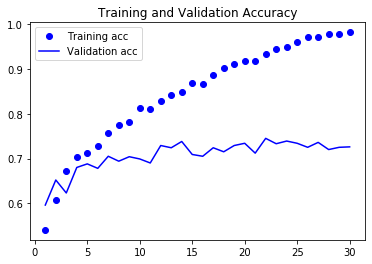

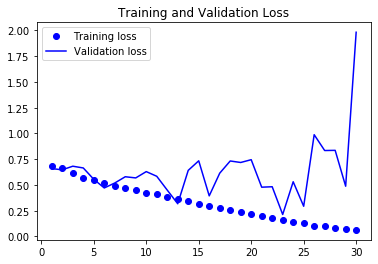

In [10]:
import matplotlib.pyplot as plt
import numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

print("== Average Scores ==\nAccuracy : ", np.mean(acc))
print("Validation Accuracy : ", np.mean(val_acc))
print()
print("Loss : ", np.mean(loss))
print("Validation Loss : ", np.mean(val_loss))

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
"5번째 epoch에서 Overfitting이 시작된다."
"훈련 정확도는 100%에 가깝지만 검증 정확도는 70%에서 멈추었다."
"훈련 손실은 거의 0에 도달하지만 검증 손실은 30정도에 다다르고 다시 증가한다."
"데이터양이 적어서 생기는 Overfitting이다."
plt.show()

In [11]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest')
"rotation_range : 랜덤하게 사진을 회전시킬 각도"
"width_shift_range, height~ : 수평과 수직으로 랜덤하게 평행이동 시킬 범위"
"shear_range : 랜덤하게 전단변화을 적용할 각도 범위"
"zoom_range : 랜덤하게 사진을 확대할 범위"
"horizontal_flip : 랜덤하게 이미지를 수평으로 뒤집습니다"
"fill_mode : 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략, nearest는 인접한 픽셀을 사용"

'fill_mode : 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략, nearest는 인접한 픽셀을 사용'

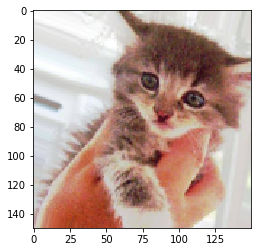

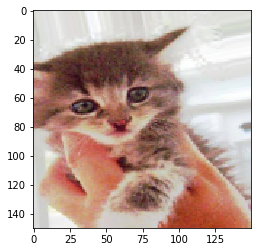

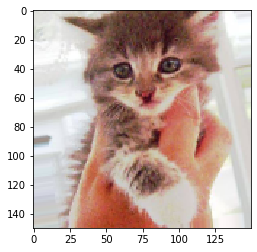

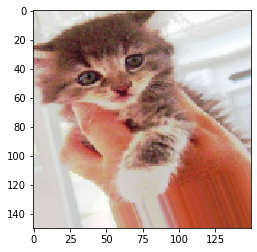

In [12]:
from keras.preprocessing import image

"고양이 사진의 이름과 train_cats_dir에 들어있는 디렉토리를 합쳐서 fnames에 저장한다."
"따라서 fnames의 각 인덱스에는 고양이 사진의 디렉토리와 이름이 있다."
fnames = sorted([os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size = (150, 150))

"이미지를 numpy 배열로 변환"
x = image.img_to_array(img)
"(150,150,3) 3D 벡터를 (1, 150, 150, 3)의 4D 벡터로 변경. 여기서 1은 배치 차원이다. flow()함수가 배치데이터를 받기때문"
x = x.reshape((1,) + x.shape)

i = 0
".flow()함수는 datagen을 기반으로 이미지 x를 임의변환 시켜 배치단위로 생성. 여기서는 이미지x를 1번(batch_size == 1)생성한다."
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [13]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
"다 똑같고 Overfitting을 억제하기 위해 Dropout층 추가"
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

In [14]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 49s 487ms/step - loss: 0.6910 - acc: 0.5284 - val_loss: 0.6751 - val_acc: 0.5774
Epoch 2/100
100/100 [==============================] - 44s 437ms/step - loss: 0.6780 - acc: 0.5656 - val_loss: 0.6719 - val_acc: 0.5934
Epoch 3/100
100/100 [==============================] - 43s 431ms/step - loss: 0.6630 - acc: 0.5824 - val_loss: 0.6275 - val_acc: 0.6307
Epoch 4/100
100/100 [==============================] - 44s 438ms/step - loss: 0.6472 - acc: 0.6058 - val_loss: 0.5527 - val_acc: 0.5722
Epoch 5/100
100/100 [==============================] - 43s 432ms/step - loss: 0.6316 - acc: 0.6301 - val_loss: 0.6021 - val_acc: 0.6459
Epoch 6/100
100/100 [==============================] - 48s 476ms/step - loss: 0.6127 - acc: 0.6655 - val_loss: 0.5886 - val_acc: 0.6836
Epoch 7/100
100/100 [==============================] - 44s 444ms/step - loss: 0.5921 - acc: 0.6765 -

== Average Scores ==
Accuracy :  0.7839792
Validation Accuracy :  0.7695413172245026

Loss :  0.44337226339994673
Validation Loss :  0.4605514121055603


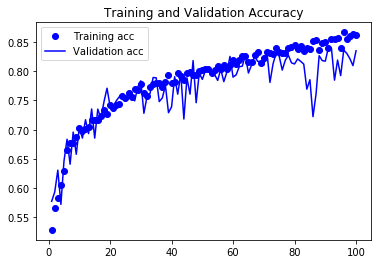

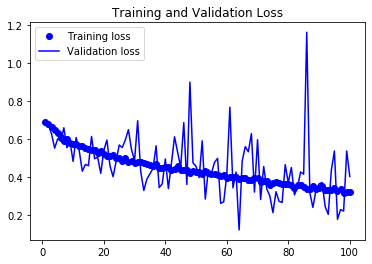

In [16]:

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

print("== Average Scores ==\nAccuracy : ", np.mean(acc))
print("Validation Accuracy : ", np.mean(val_acc))
print()
print("Loss : ", np.mean(loss))
print("Validation Loss : ", np.mean(val_loss))

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
"다른 규제 기법을 더 사용하고 네트워크 파라미터를 튜닝하면(합성곱 층의 필터 수, 네트워크 층의 수 등)"
"86 ~ 87%의 정확도를 받을 수 있다. 하지만 데이터가 적기 때문에 모델을 처음부터 훈련해서는 높은 정확도를 달성하긴 힘들다."
"따라서 우리는 이미 훈련된 모델을 사용해야만 더 높은 정확도를 달성 할 수 있다."
plt.show()

'VGG16 이라는 이미 훈련된 네트워크(모델)을 사용할 것이다.'